## 1. A data frame is created with only the image path and class label, which is needed later. 
## 2. An image from each of the class labels in the training data set are resized to 256x256, 32x32, and 70x70. The 70x70 ones are also converted to grayscale because these are the images used in the model with the best accuracy.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from skimage import color
from PIL import Image
import imageio.v2 as imageio
from resizeimage import resizeimage

In [18]:
df_train = pd.read_json('/data/raw/train_data.json', lines=True)

In [19]:
df_train.head()

image_url           image_path  \
0  https://m.media-amazon.com/images/I/81XKaSKvly...  images/train/0.jpeg   
1  https://m.media-amazon.com/images/I/91dDMDg+QT...  images/train/1.jpeg   
2  https://m.media-amazon.com/images/I/71TJ9p46PV...  images/train/2.jpeg   
3  https://m.media-amazon.com/images/I/81Y+je7CEg...  images/train/3.jpeg   
4  https://m.media-amazon.com/images/I/61B8o9Ulqp...  images/train/4.jpeg   

         brand                                      product_title class_label  \
0    Womanista  Women's Georgette Saree with Blouse Piece (TKI...       saree   
1      Yashika         Women Linen Printed Sarees Free Size (BEE)       saree   
2    Womanista  Organza Floral Print Saree with Blouse Piece(W...       saree   
3  PERFECTBLUE  Women's Digital Cotton Linen Blend Saree with ...       saree   
4   VAIVIDHYAM  Designer Sarees Women's Banarasi Cotton Silk S...       saree   

  color  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [20]:
# Making a df with only image_path and class_label
df_train.drop(['image_url', 'brand', 'product_title', 'color'], axis=1, inplace=True)

In [21]:
df_train.head()

image_path class_label
0  images/train/0.jpeg       saree
1  images/train/1.jpeg       saree
2  images/train/2.jpeg       saree
3  images/train/3.jpeg       saree
4  images/train/4.jpeg       saree

In [38]:
df_train.to_csv('/data/interim/df_train_image_label.csv')

In [39]:
df_test = pd.read_json('/data/raw/test_data.json', lines = True)

In [40]:
df_test.head()

image_url          image_path  \
0  https://m.media-amazon.com/images/I/71NZQ-aaAS...  images/test/0.jpeg   
1  https://m.media-amazon.com/images/I/81aQmbWsG7...  images/test/1.jpeg   
2  https://m.media-amazon.com/images/I/71YjGvzs9y...  images/test/2.jpeg   
3  https://m.media-amazon.com/images/I/81JYhYV5Xr...  images/test/3.jpeg   
4  https://m.media-amazon.com/images/I/91fXc5i5Dy...  images/test/4.jpeg   

                     brand                                      product_title  \
0  TANTUJA BENGAL HANDLOOM  (A Govt. of West Bengal Enterprises) Handloom ...   
1               Trilok Fab               Women's Silk Saree With Blouse Piece   
2              Nine Sister  Women's Georgette Net Embroidered Saree with B...   
3   Gauri Laxmi Enterprise  Women's Crepe Saree with Blouse (GLE$CHICKOO C...   
4                   SOURBH  Women's Cotton Blend Digital Butta Printed Sar...   

  class_label color  
0       saree   NaN  
1       saree   NaN  
2       saree   NaN  
3       saree   NaN  
4       saree   NaN

In [41]:
# Making a df with only image_path and class_label
df_test.drop(['image_url', 'brand', 'product_title', 'color'], axis=1, inplace=True)

In [42]:
df_test.head()

image_path class_label
0  images/test/0.jpeg       saree
1  images/test/1.jpeg       saree
2  images/test/2.jpeg       saree
3  images/test/3.jpeg       saree
4  images/test/4.jpeg       saree

In [43]:
df_test.to_csv('/data/interim/df_test_image_label.csv')

In [44]:
df_val = pd.read_json('/data/raw/val_data.json', lines=True)

In [45]:
df_val.head()

image_url         image_path  \
0  https://m.media-amazon.com/images/I/81LOPbFPiQ...  images/val/0.jpeg   
1  https://m.media-amazon.com/images/I/81Q8Oktw4s...  images/val/1.jpeg   
2  https://m.media-amazon.com/images/I/613S1YGCmo...  images/val/2.jpeg   
3  https://m.media-amazon.com/images/I/819budhQl1...  images/val/3.jpeg   
4  https://m.media-amazon.com/images/I/61cAZ94ZQV...  images/val/4.jpeg   

             brand                                      product_title  \
0          Generic  Women's Khadi Cotton Saree With Blouse Piece (...   
1  Yashvi Designer     Women's Net Saree With Unstitched Blouse Piece   
2           Aarrah  Georgette Strip Print Saree[S_SHIKHA30021SR02_...   
3           MIMOSA        Women's Patola Style Art Silk Saree (Green)   
4          Generic  Women's Pure Hand Block Patola Printed Cotton ...   

  class_label color  
0       saree   NaN  
1       saree   NaN  
2       saree   NaN  
3       saree   NaN  
4       saree   NaN

In [46]:
# Making a df with only image_path and class_label
df_val.drop(['image_url', 'brand', 'product_title', 'color'], axis=1, inplace=True)

In [47]:
df_val.head()

image_path class_label
0  images/val/0.jpeg       saree
1  images/val/1.jpeg       saree
2  images/val/2.jpeg       saree
3  images/val/3.jpeg       saree
4  images/val/4.jpeg       saree

In [48]:
df_val.to_csv('/data/interim/df_val_image_label.csv')

### Women's mojaris

In [22]:
df_train.iloc[60050,1]

'mojaris_women'

In [32]:
img = imageio.imread('/data/raw/images/train/60050.jpeg')
img.shape

(212, 320, 3)

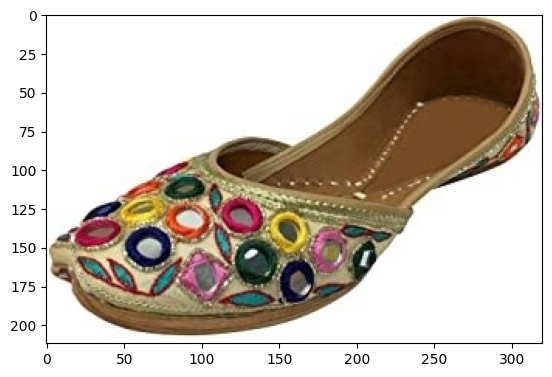

In [16]:
_ = plt.imshow(img)

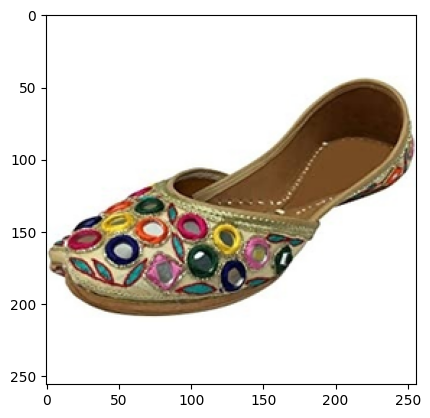

In [25]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/60050.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

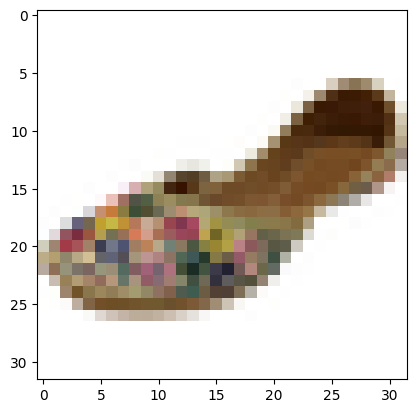

In [27]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/60050.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

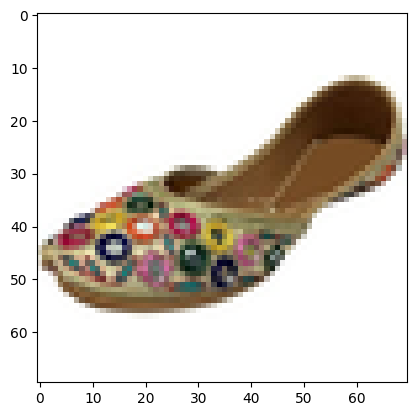

In [28]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/60050.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

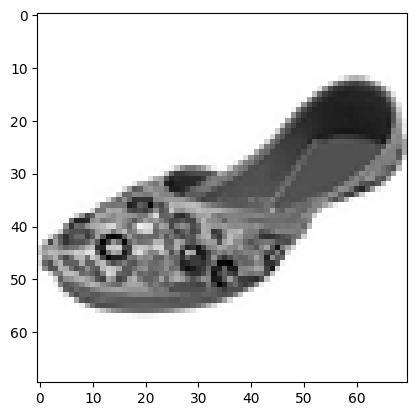

In [29]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Saree

In [116]:
df_train.iloc[0,1]

'saree'

In [33]:
img = imageio.imread('/data/raw/images/train/0.jpeg')
img.shape

(320, 89, 3)

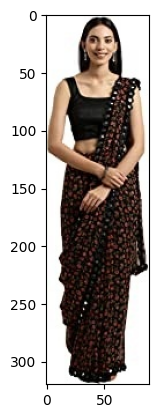

In [117]:
_ = plt.imshow(img)

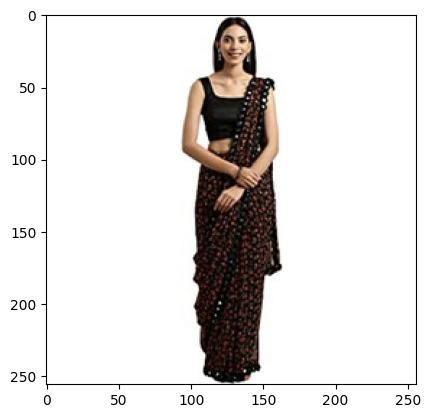

In [46]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/0.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

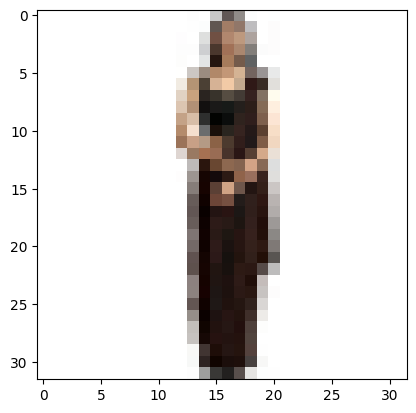

In [47]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/0.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

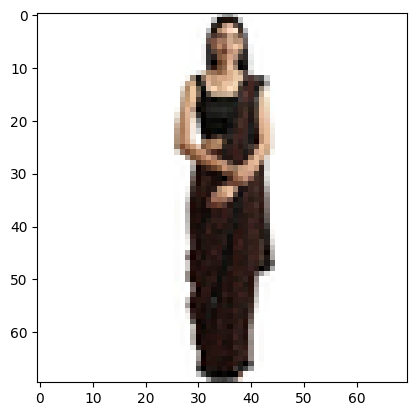

In [48]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/0.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

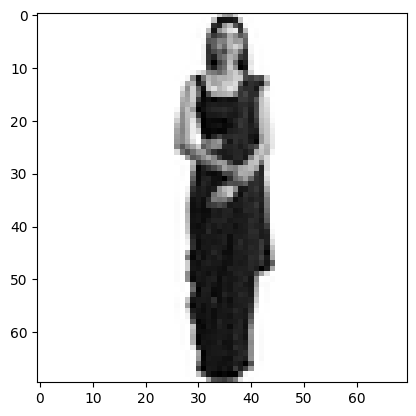

In [49]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Dhoti pants

In [54]:
df_train.iloc[20000,1]

'dhoti_pants'

In [34]:
img = imageio.imread('/data/raw/images/train/20000.jpeg')
img.shape

(320, 115, 3)

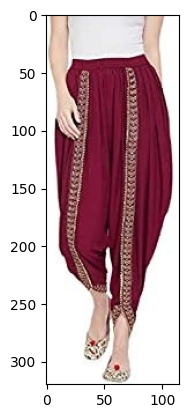

In [53]:
_ = plt.imshow(img)

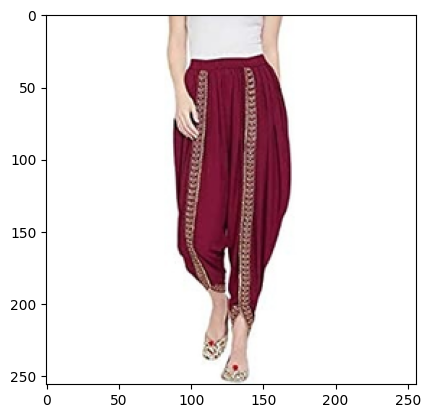

In [55]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/20000.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

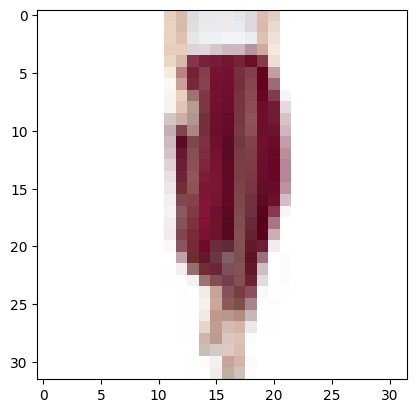

In [56]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/20000.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

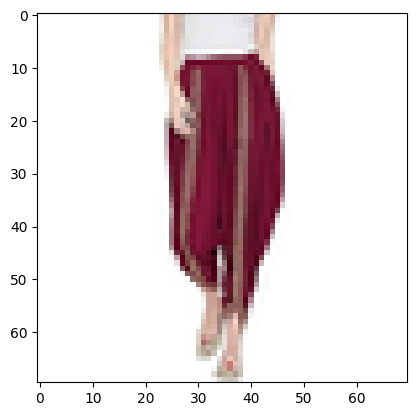

In [57]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/20000.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

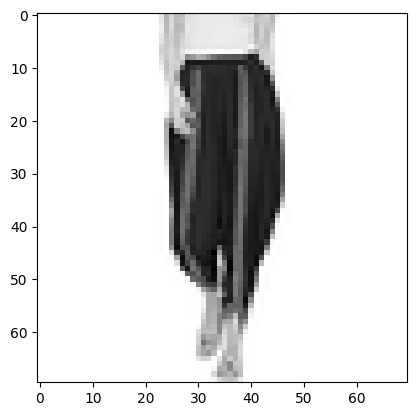

In [58]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Dupatta

In [61]:
df_train.iloc[30000,1]

'dupattas'

In [35]:
img = imageio.imread('/data/raw/images/train/30000.jpeg')
img.shape

(320, 92, 3)

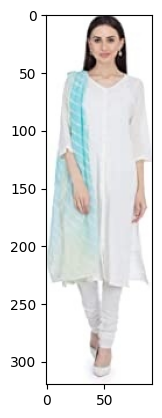

In [60]:
_ = plt.imshow(img)

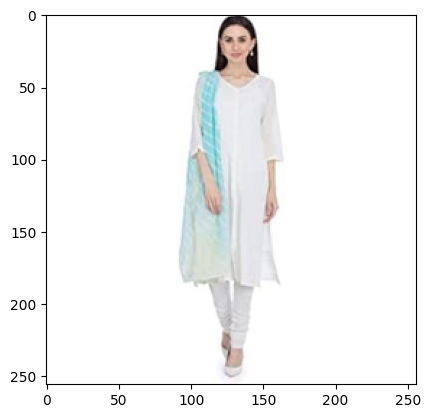

In [62]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/30000.jpeg')  
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

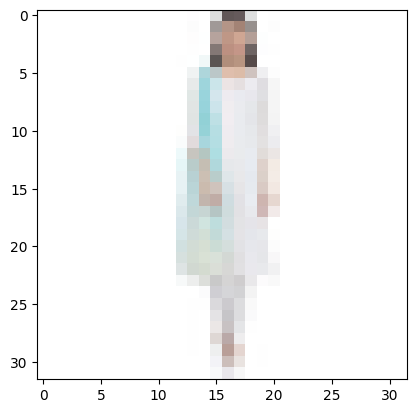

In [63]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/30000.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

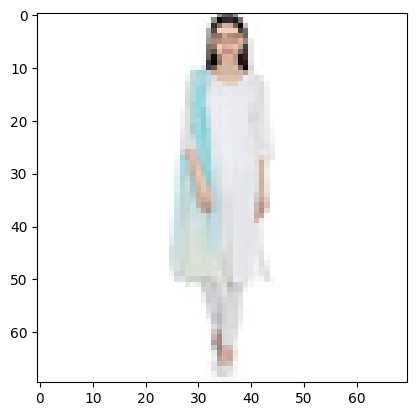

In [64]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/30000.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

### Men's kurta

In [68]:
df_train.iloc[40000,1]

'kurta_men'

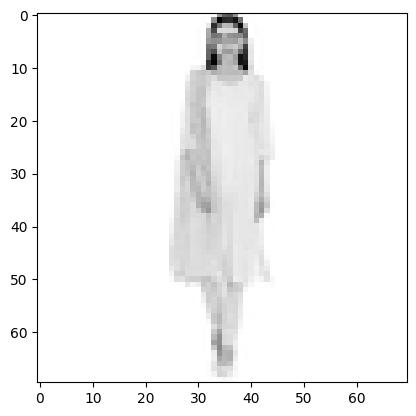

In [65]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

## Men's kurta

In [56]:
df_train.iloc[40000,1]

'kurta_men'

In [36]:
img = imageio.imread('/data/raw/images/train/40000.jpeg')
img.shape

(320, 155, 3)

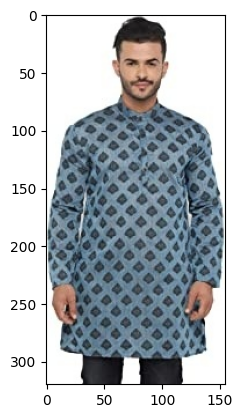

In [67]:
_ = plt.imshow(img)

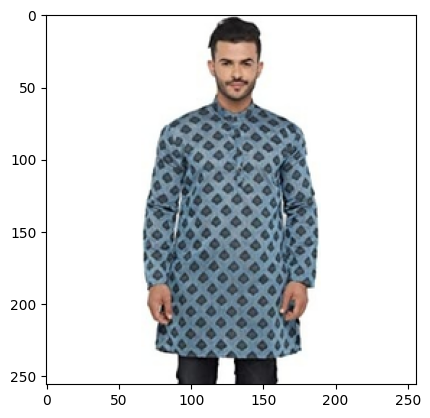

In [69]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/40000.jpeg') 
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

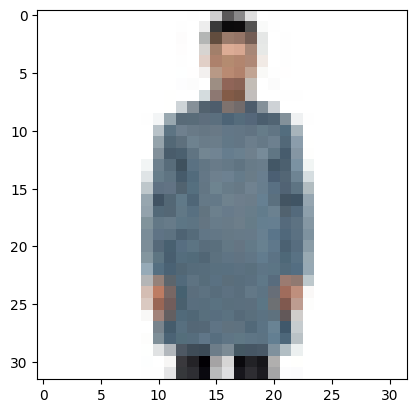

In [70]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/40000.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

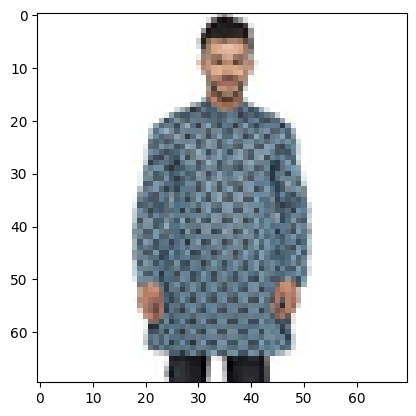

In [71]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/40000.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

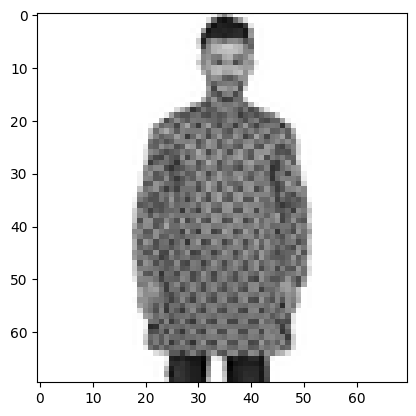

In [72]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

## Leggings and salwars

In [83]:
df_train.iloc[50000,1]

'leggings_and_salwars'

In [37]:
img = imageio.imread('/data/raw/images/train/50000.jpeg')
img.shape

(720, 540, 3)

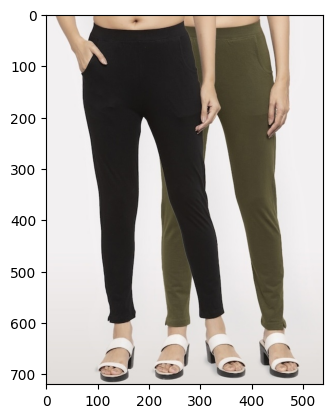

In [82]:
_ = plt.imshow(img)

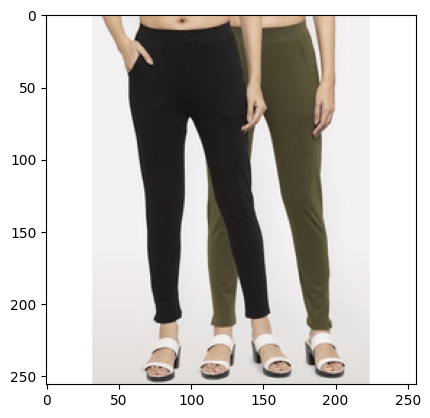

In [85]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/50000.jpeg')   
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

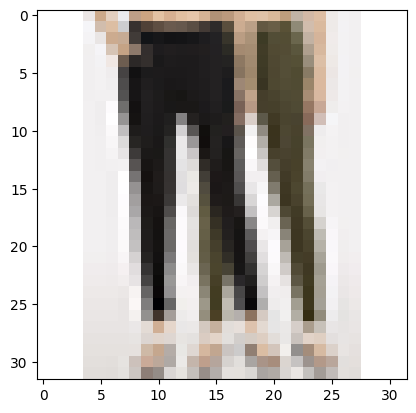

In [86]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/50000.jpeg') 
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

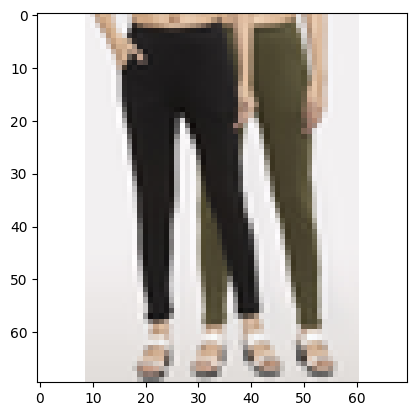

In [87]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/50000.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

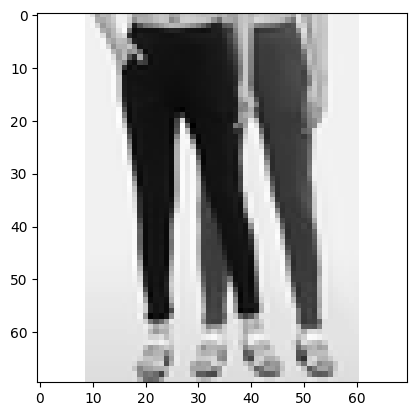

In [88]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Palazzos

In [98]:
df_train.iloc[70000,1]

'palazzos'

In [39]:
img = imageio.imread('/data/raw/images/train/70000.jpeg')
img.shape

(720, 540, 3)

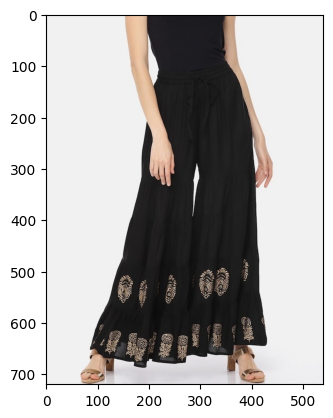

In [97]:
_ = plt.imshow(img)

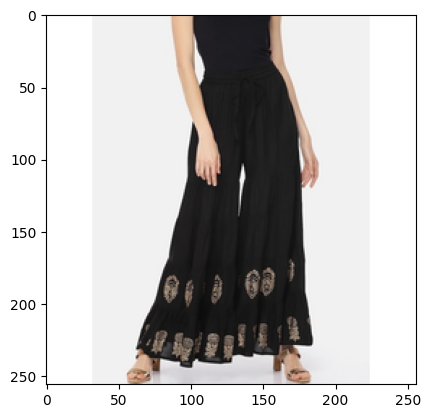

In [99]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/70000.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

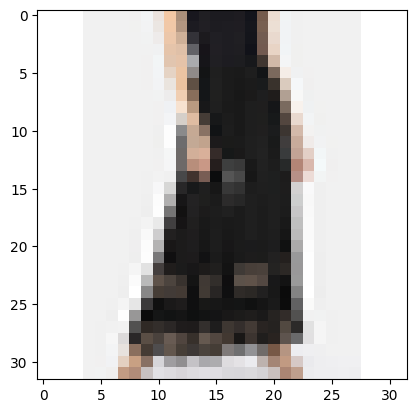

In [100]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/70000.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

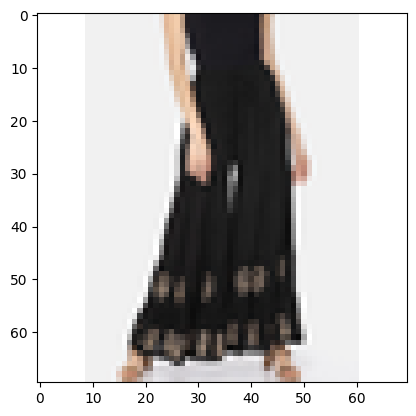

In [101]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/70000.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

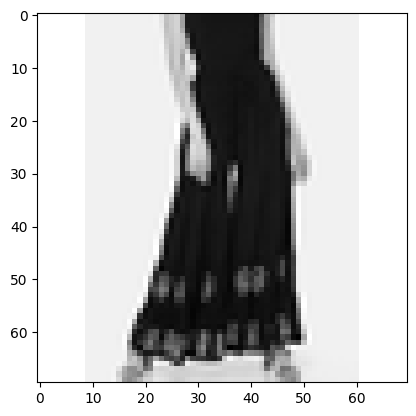

In [102]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Women's kurta

In [105]:
df_train.iloc[80000,1]

'women_kurta'

In [40]:
img = imageio.imread('/data/raw/images/train/80000.jpeg')
img.shape

(320, 149, 3)

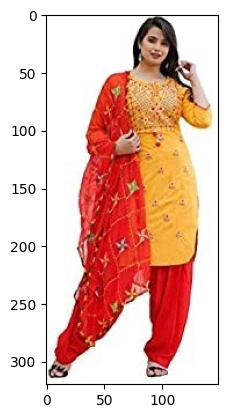

In [104]:
_ = plt.imshow(img)

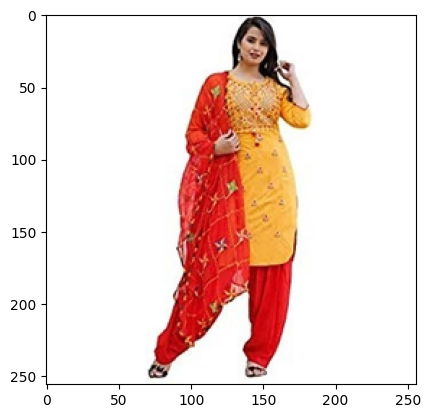

In [106]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/80000.jpeg') 
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

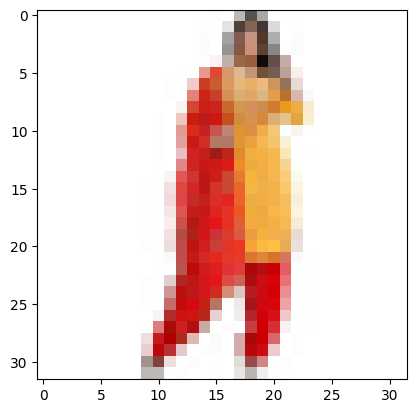

In [107]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/80000.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

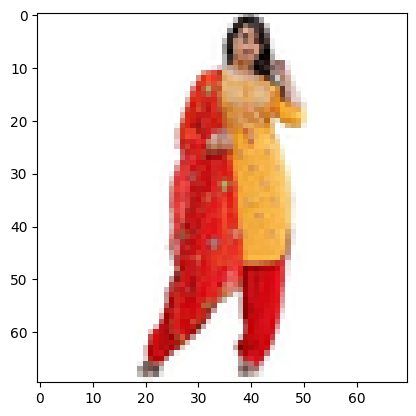

In [108]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/80000.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

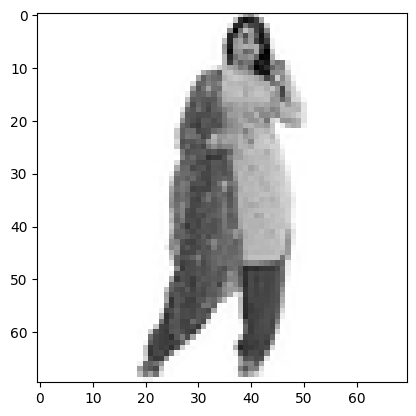

In [109]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Blouse

In [122]:
df_train.iloc[15000,1]

'blouse'

In [41]:
img = imageio.imread('/data/raw/images/train/15500.jpeg')
img.shape

(294, 320, 3)

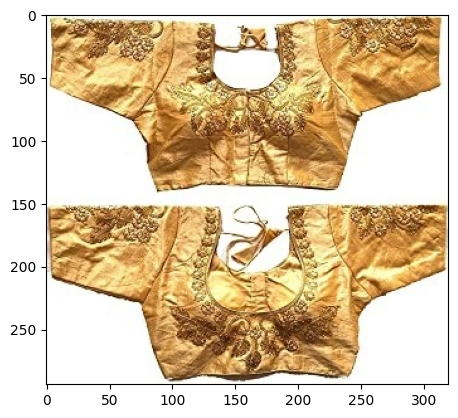

In [126]:
_ = plt.imshow(img)

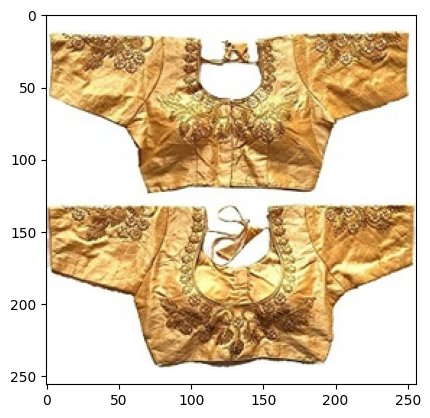

In [127]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/15500.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

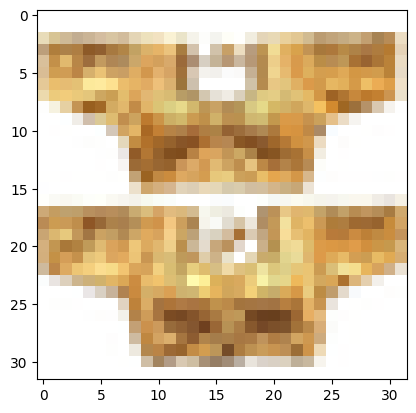

In [128]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/15500.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

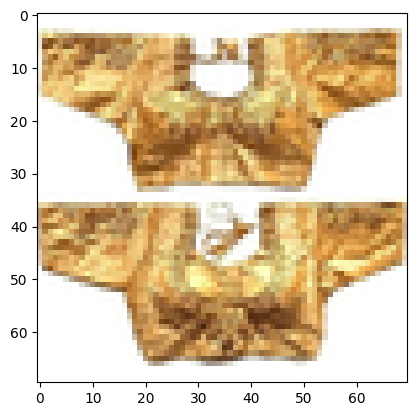

In [129]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/15500.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

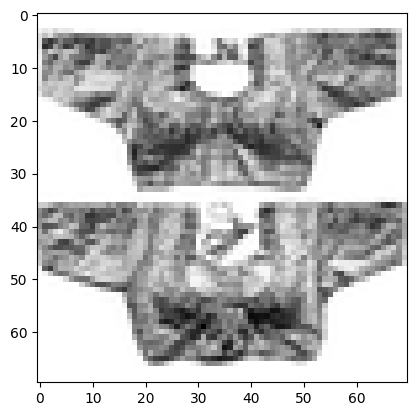

In [130]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Gown

In [47]:
df_train.iloc[30701,1]

'gowns'

In [48]:
img = imageio.imread('/data/raw/images/train/30701.jpeg')
img.shape

(320, 188, 3)

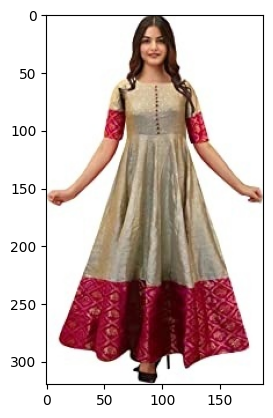

In [49]:
_ = plt.imshow(img)

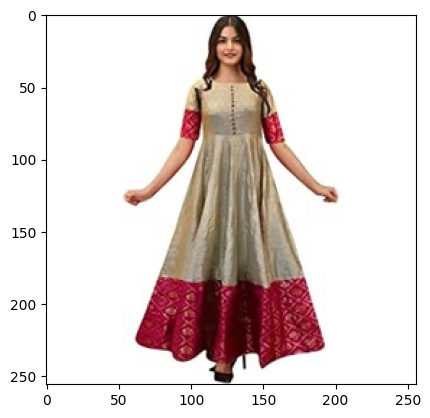

In [50]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/30701.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

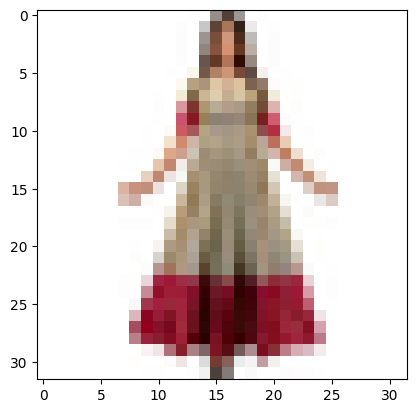

In [53]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/30701.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

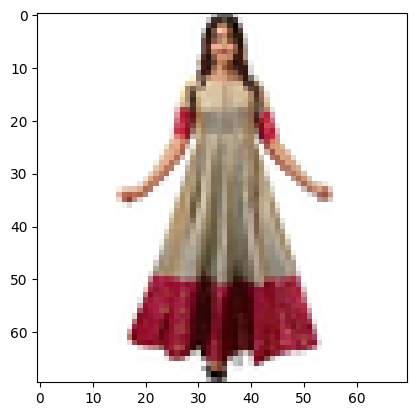

In [54]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/30701.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

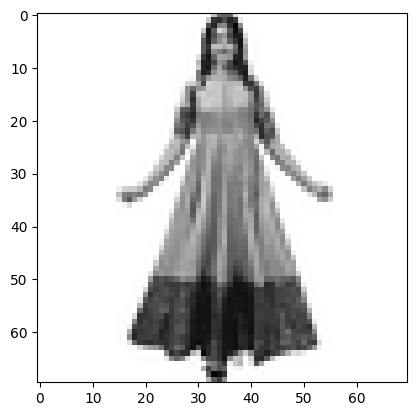

In [55]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Nehru Jacket

In [135]:
df_train.iloc[65000,1]

'nehru_jackets'

In [42]:
img = imageio.imread('/data/raw/images/train/65000.jpeg')
img.shape

(320, 186, 3)

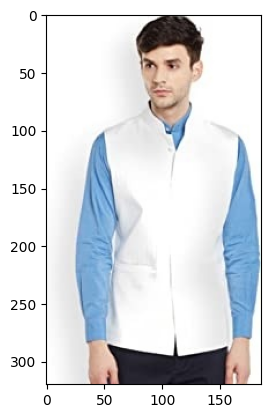

In [134]:
_ = plt.imshow(img)

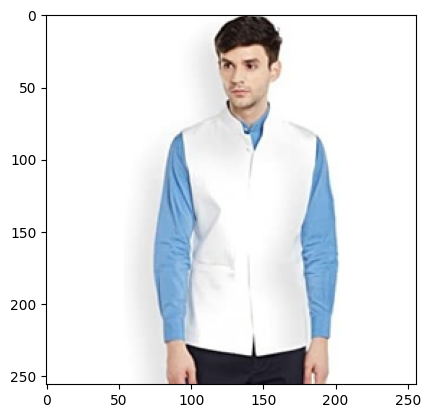

In [136]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/65000.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

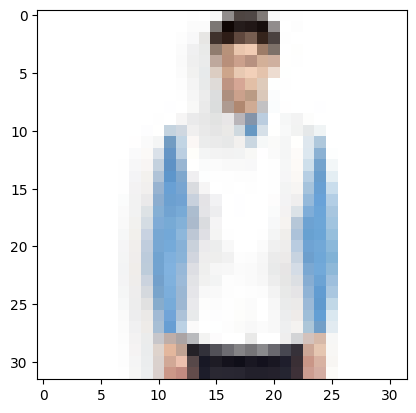

In [138]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/65000.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

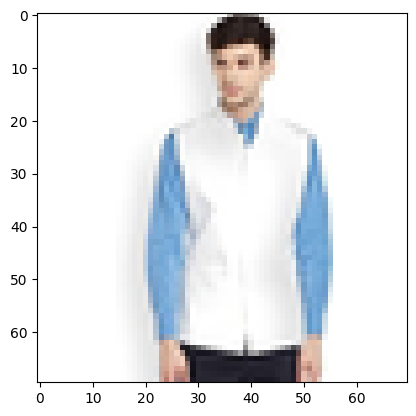

In [139]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/65000.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

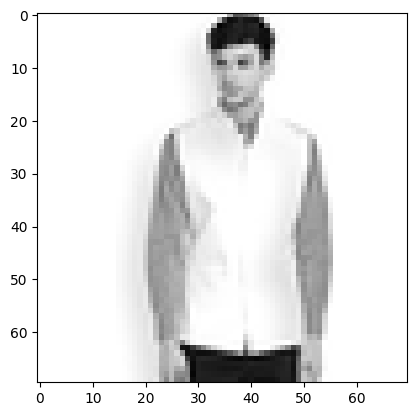

In [140]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Lehenga

In [142]:
df = df_train[df_train.class_label == 'lehenga']
df.head()

image_path class_label
50646  images/train/50646.jpeg     lehenga
50647  images/train/50647.jpeg     lehenga
50648  images/train/50648.jpeg     lehenga
50649  images/train/50649.jpeg     lehenga
50650  images/train/50650.jpeg     lehenga

In [43]:
img = imageio.imread('/data/raw/images/train/50670.jpeg')
img.shape

(320, 305, 3)

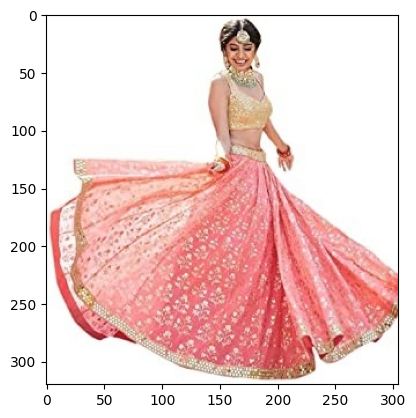

In [148]:
_ = plt.imshow(img)

In [149]:
df_train.iloc[50670,1]

'lehenga'

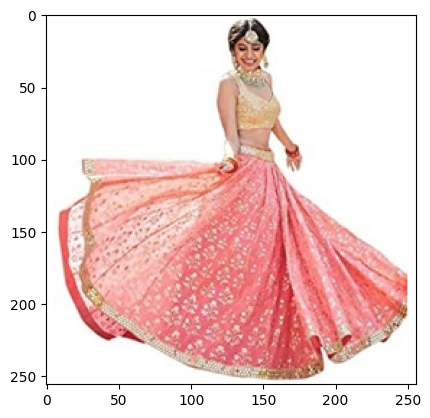

In [150]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/50670.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

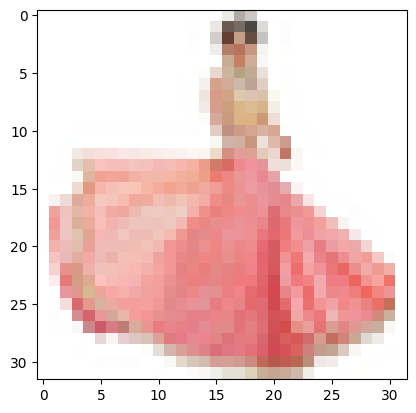

In [152]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/50670.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

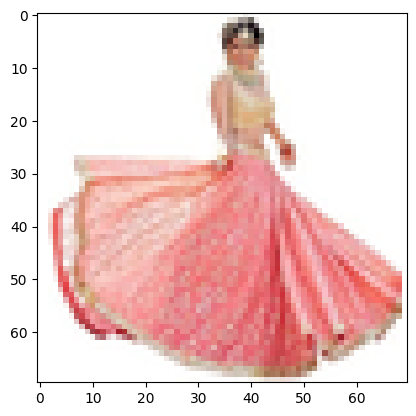

In [153]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/50670.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

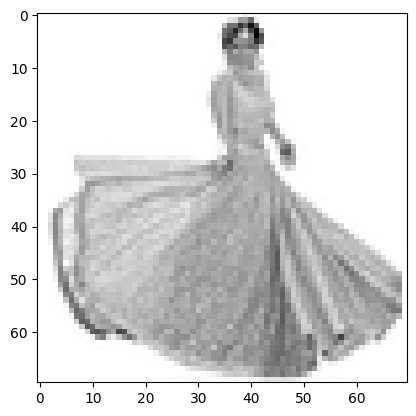

In [154]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Men's mojaris

In [155]:
df = df_train[df_train.class_label == 'mojaris_men']
df.head()

image_path  class_label
56399  images/train/56399.jpeg  mojaris_men
56400  images/train/56400.jpeg  mojaris_men
56401  images/train/56401.jpeg  mojaris_men
56402  images/train/56402.jpeg  mojaris_men
56403  images/train/56403.jpeg  mojaris_men

In [44]:
img = imageio.imread('/data/raw/images/train/57397.jpeg')
img.shape

(220, 320, 3)

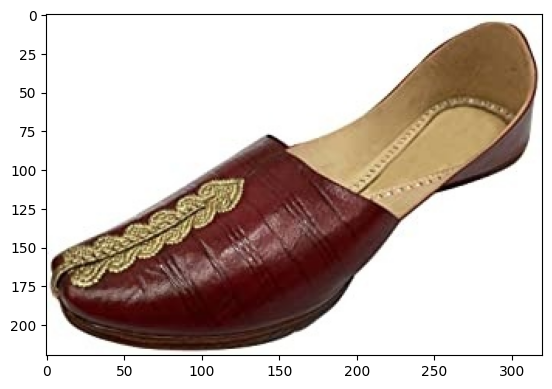

In [161]:
_ = plt.imshow(img)

In [162]:
df_train.iloc[57397,1]

'mojaris_men'

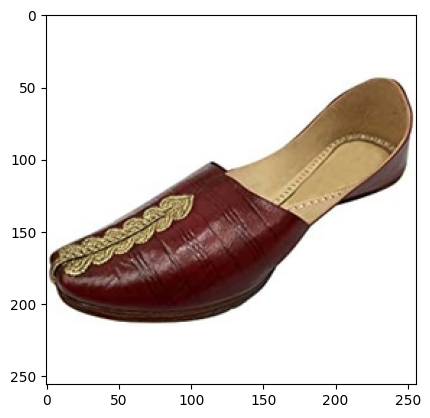

In [163]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/57397.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

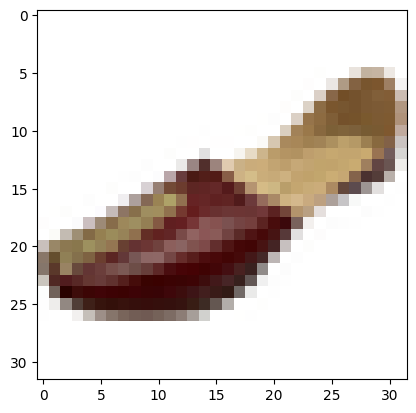

In [164]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/57397.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

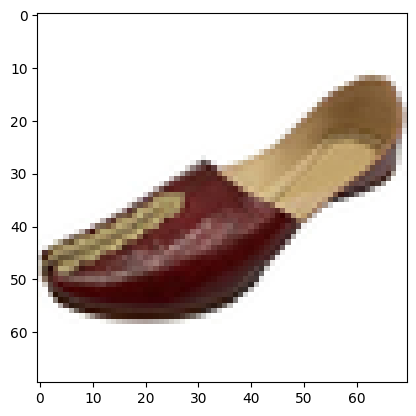

In [165]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/57397.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

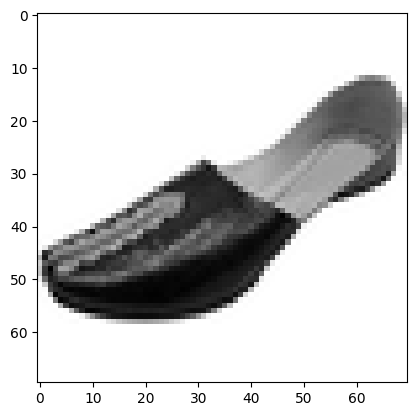

In [166]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Petticoat

In [167]:
df = df_train[df_train.class_label == 'petticoats']
df.head()

image_path class_label
72039  images/train/72039.jpeg  petticoats
72040  images/train/72040.jpeg  petticoats
72041  images/train/72041.jpeg  petticoats
72042  images/train/72042.jpeg  petticoats
72043  images/train/72043.jpeg  petticoats

In [45]:
img = imageio.imread('/data/raw/images/train/72039.jpeg')
img.shape

(320, 175, 3)

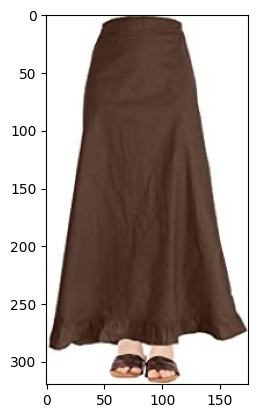

In [169]:
_ = plt.imshow(img)

In [170]:
df_train.iloc[72039,1]

'petticoats'

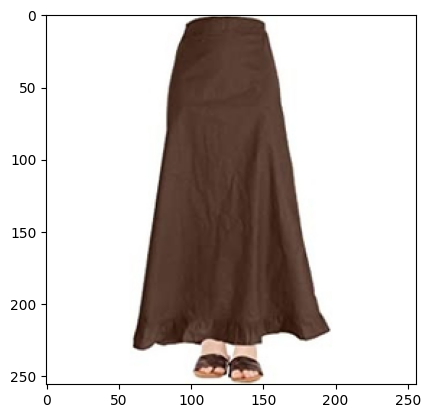

In [171]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/72039.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

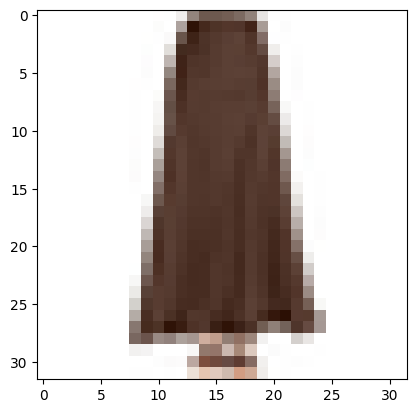

In [172]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/72039.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

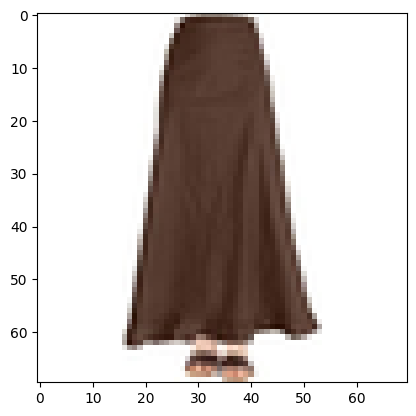

In [173]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/72039.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

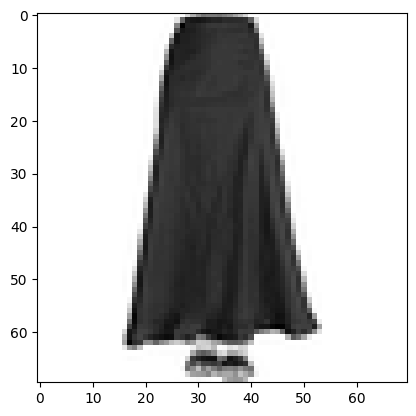

In [174]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')

### Sherwani

In [175]:
df = df_train[df_train.class_label == 'sherwanis']
df.head()

image_path class_label
76480  images/train/76480.jpeg   sherwanis
76481  images/train/76481.jpeg   sherwanis
76482  images/train/76482.jpeg   sherwanis
76483  images/train/76483.jpeg   sherwanis
76484  images/train/76484.jpeg   sherwanis

In [46]:
img = imageio.imread('/data/raw/images/train/76480.jpeg')
img.shape

(320, 111, 3)

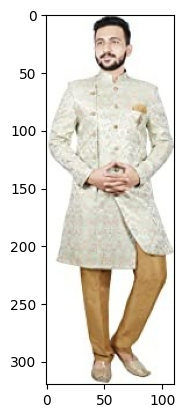

In [178]:
_ = plt.imshow(img)

In [179]:
df_train.iloc[76480,1]

'sherwanis'

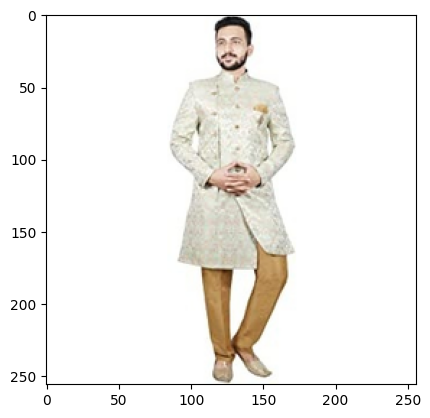

In [180]:
# Resizing to 256x256
img = Image.open('/data/raw/images/train/76480.jpeg')
img = resizeimage.resize_contain(img, [256, 256])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

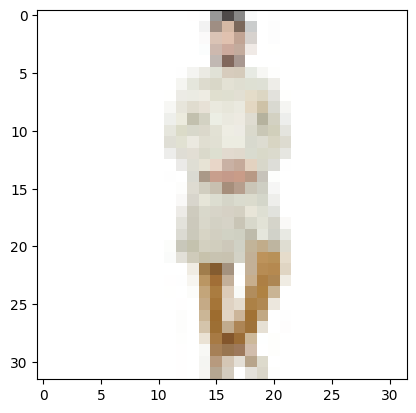

In [181]:
# Resizing to 32x32
img = Image.open('/data/raw/images/train/76480.jpeg')
img = resizeimage.resize_contain(img, [32, 32])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

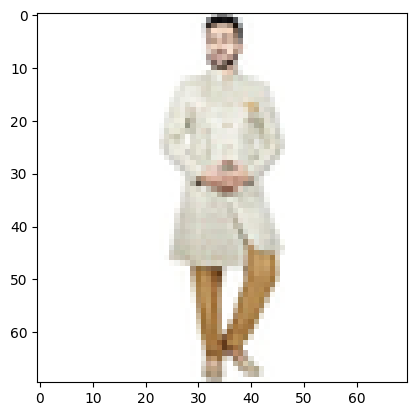

In [182]:
# Resizing to 70x70
img = Image.open('/data/raw/images/train/76480.jpeg')
img = resizeimage.resize_contain(img, [70, 70])

# Coverting to RGB from RGBA
img = img.convert('RGB')
_ = plt.imshow(img)

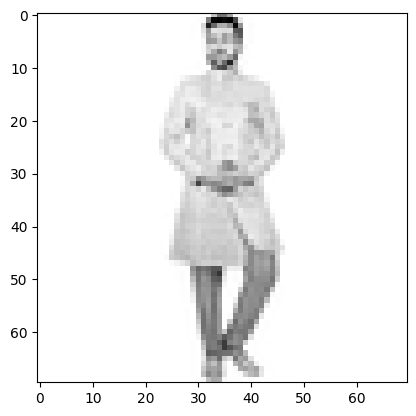

In [183]:
# Converting to grayscale
img = img.convert('L')
_ = plt.imshow(img, cmap='gray')